### This submission was prepared by:
Muhammad Borhan 10916597 <br>
and <br>
Amirul Mohd Hamka 10922049



# __Machine Learning Coursework 1 - Linear Regression with Stochastic Gradient Descent (SGD)__

#### Step 1 - Exploratory Data Analysis (EDA) 
Purpose: To understand the structure, distribution, and quality of the dataset. This ensures that the data is clean (no missing values) and suitable for modeling without requiring transformations

In [93]:
#importing all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [94]:
# Load the dataset
data = r"window_heat.csv"
df = pd.read_csv(data)

In [95]:
# Display the first few rows of the dataframe for an overview
df.head()

,dT[C],Qdot[W]
0,21.178681,11401.184490
1,14.291487,7685.340740
2,4.461636,2008.096958
3,12.111569,5101.150536
4,10.510689,6033.044369


In [96]:
# Provide summary statistics to understand the data distribution
df.describe()

,dT[C],Qdot[W]
count,24.000000,24.000000
mean,12.817510,6398.294138
std,6.413851,3290.322723
min,1.054535,482.653133
25%,8.813390,4336.959436
50%,12.858729,6378.707791
75%,18.042443,9143.042818
max,21.930115,11507.788760


In [97]:
# Check for missing values in the dataset
print(df.isnull().sum())

dT[C]      0
Qdot[W]    0
dtype: int64


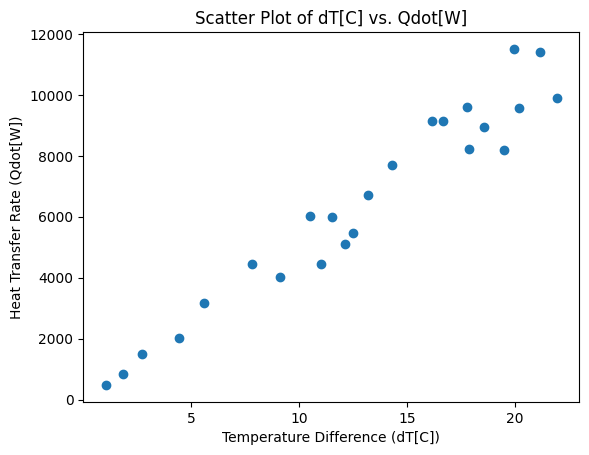

In [98]:
# Scatter plot to visualize the relationship between 'dT[C]' (temperature) and 'Qdot[W]'
plt.scatter(df['dT[C]'], df['Qdot[W]'])
plt.xlabel('Temperature Difference (dT[C])')
plt.ylabel('Heat Transfer Rate (Qdot[W])')
plt.title('Scatter Plot of dT[C] vs. Qdot[W]')
plt.show()

Conclusion: All data is available, no missing values, and the data appears normally distributed.

#### Step 2 - Define the Loss and Model Functions
Purpose: To set up the mathematical foundation for linear regression. This includes defining loss functions (MSE and MAE) to quantify model accuracy and implementing SGD to optimize model parameters (weight and bias).

In [99]:
# Normalizing the feature (x) and target (y) to scale between 0 and 1
x= df["dT[C]"]
y=df["Qdot[W]"]
x = (x - np.min(x)) / (np.max(x) - np.min(x))
y = (y - np.min(y)) / (np.max(y) - np.min(y))
points = len(x)

# Display normalized values (sanity check)
print(x)

0     0.964004
1     0.634088
2     0.163210
3     0.529664
4     0.452977
5     0.037599
6     0.722763
7     0.477402
8     0.502432
9     0.582549
10    0.839764
11    0.805104
12    0.000000
13    0.387519
14    0.548360
15    0.800288
16    0.747985
17    0.905421
18    0.218149
19    0.324130
20    0.883355
21    0.916948
22    1.000000
23    0.079813
Name: dT[C], dtype: float64


In [100]:
# Function to compute the Mean Absolute Error (MAE) loss
def lossmae(w, b, x, y, points):
    """
    w: weight
    b: bias
    x: feature
    y: label
    points: length of dataset 
    
    """
    total_loss = 0
    for i in range(points):
        total_loss += abs(y[i] - (w * x[i] + b))  # Using absolute error instead of squared error
    
    total_loss = total_loss / float(points)  # Averaging over the number of points
    
    return total_loss


In [101]:
def sgd_linear_regression_mae(x, y, w, b, alpha, points, epoch):
    """
    x: feature
    y: label
    w: initial / current weight
    b: initial / current bias
    alpha: learning rate
    points: length of dataset 
    epoch: number of training iterations
    """
    
    cost_list = []
    epoch_list = []

    for i in range(epoch):
        # Select a random data point for stochastic gradient descent
        random_index = random.randint(0, points - 1)
        x_i = x[random_index]
        y_i = y[random_index]

        # Predict the output
        y_predicted = w * x_i + b

        # Compute gradients for this data point
        dl_dw =  - x_i * (y_i - y_predicted) / abs(y_i - y_predicted)
        dl_db =  - (y_i - y_predicted) / abs(y_i - y_predicted)

        # Update weights and bias
        w = w - alpha * dl_dw
        b = w - alpha * dl_db

        # Compute the loss
        loss = lossmae(w, b, x, y, points)
        #loss = (y_i - y_predicted) ** 2

        # Log loss every 10 epochs
        if i % 100 == 0:
            cost_list.append(loss)
            epoch_list.append(i)
            print(f'Epoch:{i}, Loss:{loss}')

    return w, b, loss, cost_list, epoch_list

#### Step 3 - Train the Model and Visualize Results
Purpose: To apply the defined methods, optimize the model parameters using SGD, and evaluate its performance by plotting predictions and observing cost reduction trends for MAE.

In [102]:
# Train the model using MAE loss
w,b,loss,cost_list,epoch_list = sgd_linear_regression_mae(x,y,1,1,0.001,points=points,epoch=10000)

Epoch:0, Loss:1.0245395397368096
Epoch:100, Loss:0.9300439190926567
Epoch:200, Loss:0.8360251671628401
Epoch:300, Loss:0.745745998424955
Epoch:400, Loss:0.6493918026271215
Epoch:500, Loss:0.5684975717965252
Epoch:600, Loss:0.4880013155386085
Epoch:700, Loss:0.3988207081080443
Epoch:800, Loss:0.31231276933346225
Epoch:900, Loss:0.2519605816165084
Epoch:1000, Loss:0.20122155780969023
Epoch:1100, Loss:0.17357533817837767
Epoch:1200, Loss:0.16780834649581267
Epoch:1300, Loss:0.16926794508811438
Epoch:1400, Loss:0.16530728050670798
Epoch:1500, Loss:0.165423467256154
Epoch:1600, Loss:0.16523439625679062
Epoch:1700, Loss:0.16245995792039747
Epoch:1800, Loss:0.16156451471351937
Epoch:1900, Loss:0.16290767819161453
Epoch:2000, Loss:0.1652187307616201
Epoch:2100, Loss:0.16707187440325158
Epoch:2200, Loss:0.1673728946950311
Epoch:2300, Loss:0.16713243959392207
Epoch:2400, Loss:0.16685286468617622
Epoch:2500, Loss:0.16798349066091234
Epoch:2600, Loss:0.1667166502993764
Epoch:2700, Loss:0.165199808

In [108]:
# Display final weight and bias
print("Best model with parameters: Weight:", w, "Bias:", b, "Loss:", loss)

Best model with parameters: Weight: 0.411699101757576 Bias: 0.412699101757576 Loss: 0.16587332096209492


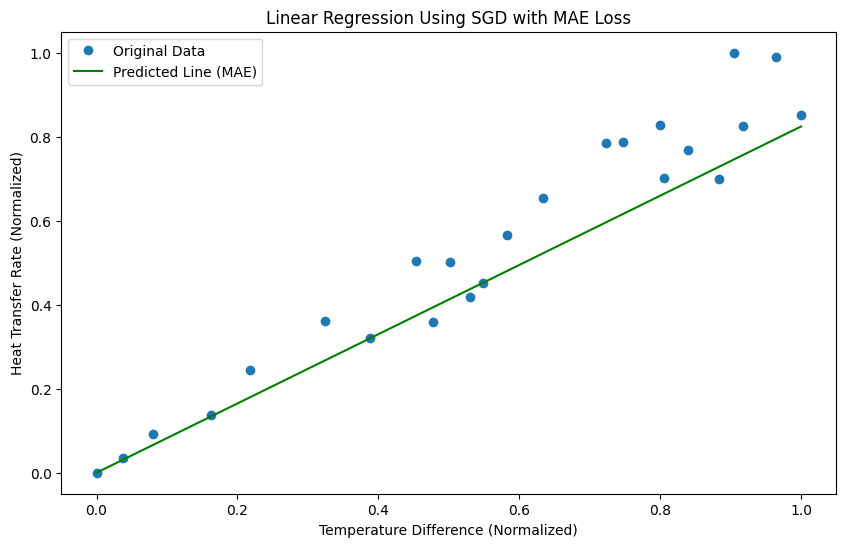

In [106]:
# Plot the original data and the predicted regression line (MAE)
plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', ls='', label='Original Data')
plt.plot([0, 1], [0, w*1 + b], label='Predicted Line (MAE)', color='green')
plt.xlabel('Temperature Difference (Normalized)')
plt.ylabel('Heat Transfer Rate (Normalized)')
plt.title('Linear Regression Using SGD with MAE Loss')
plt.legend()
plt.show()


Text(0, 0.5, 'Cost')

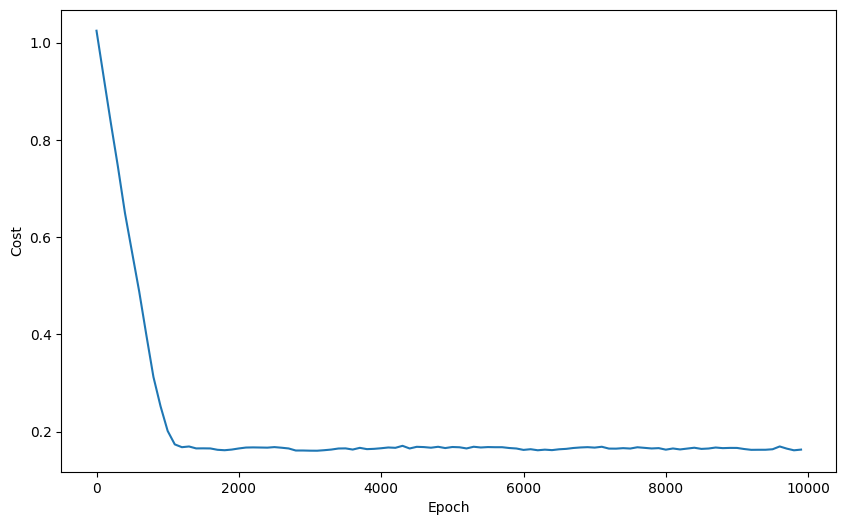

In [105]:
plt.figure(figsize=(10, 6))
plt.plot(epoch_list,cost_list)
plt.xlabel('Epoch')
plt.ylabel('Cost')